# Prepare Data

In [1]:
# Load data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/Surgical-deepnet.csv"

Mounted at /content/drive


# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# EDA

In [7]:
df=pd.read_csv(path)
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


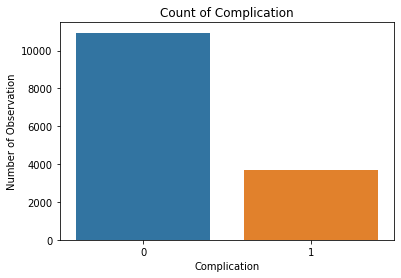

In [ ]:
sns.countplot('complication',data=df)
plt.title('Count of Complication')
plt.xlabel('Complication')
plt.ylabel('Number of Observation')
plt.show()

In [ ]:
df["complication"].value_counts() 

0    10945
1     3690
Name: complication, dtype: int64

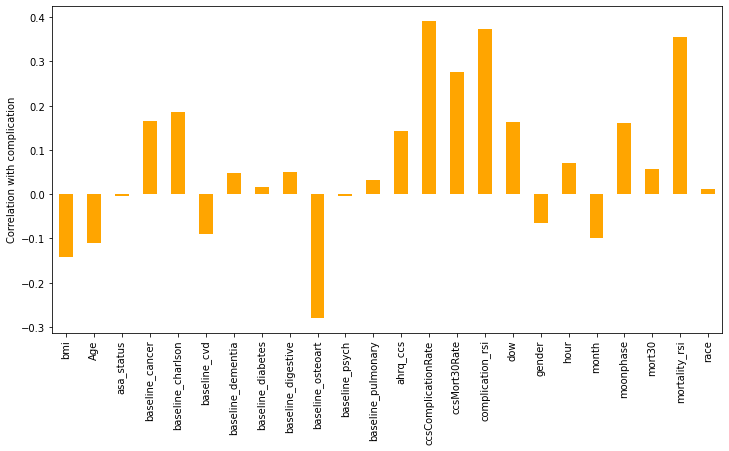

In [ ]:
cor_mat= df.corr()
cor_mat['complication'][:-1].plot.bar(color='orange', figsize=(12,6))
plt.ylabel("Correlation with complication")
plt.show()

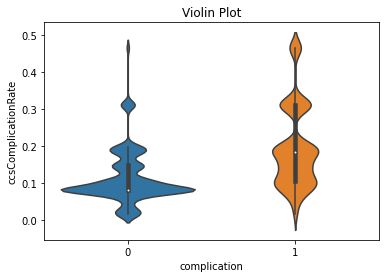

In [ ]:
sns.violinplot(y='ccsComplicationRate',x='complication',data=df)
plt.title('Violin Plot')
plt.show()

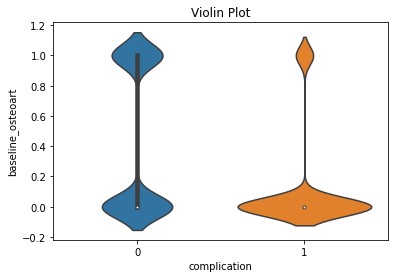

In [ ]:
sns.violinplot(y='baseline_osteoart',x='complication',data=df)
plt.title('Violin Plot')
plt.show()

In [ ]:
features = df.drop(["complication"],axis=1)
for feature in features:
    stat, p = shapiro(df[feature])
    print('Feature {}'.format(feature))
    print('stat=%.3f, p=%.3f' % (stat, p))    
    if p > 0.05:
        print('Probably feature "{}" is Normally Distributed'.format(feature))
        print('\n')
    else:
        print('Probably feature "{}" is not Normally Distributed'.format(feature))
        print('\n')

Feature bmi
stat=0.890, p=0.000
Probably feature "bmi" is not Normally Distributed


Feature Age
stat=0.940, p=0.000
Probably feature "Age" is not Normally Distributed


Feature asa_status
stat=0.703, p=0.000
Probably feature "asa_status" is not Normally Distributed


Feature baseline_cancer
stat=0.549, p=0.000
Probably feature "baseline_cancer" is not Normally Distributed


Feature baseline_charlson
stat=0.602, p=0.000
Probably feature "baseline_charlson" is not Normally Distributed


Feature baseline_cvd
stat=0.615, p=0.000
Probably feature "baseline_cvd" is not Normally Distributed


Feature baseline_dementia
stat=0.041, p=0.000
Probably feature "baseline_dementia" is not Normally Distributed


Feature baseline_diabetes
stat=0.380, p=0.000
Probably feature "baseline_diabetes" is not Normally Distributed


Feature baseline_digestive
stat=0.478, p=0.000
Probably feature "baseline_digestive" is not Normally Distributed


Feature baseline_osteoart
stat=0.600, p=0.000
Probably feature "b

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#Duplicate Data

In [ ]:
duplicate_data=df.duplicated().sum()
duplicate_data
df.drop_duplicates(inplace=True)

# Removing Outlier

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

bmi                    11.830000
Age                    21.700000
asa_status              1.000000
baseline_cancer         1.000000
baseline_charlson       2.000000
baseline_cvd            1.000000
baseline_dementia       0.000000
baseline_diabetes       0.000000
baseline_digestive      0.000000
baseline_osteoart       0.000000
baseline_psych          0.000000
baseline_pulmonary      0.000000
ahrq_ccs               10.000000
ccsComplicationRate     0.101394
ccsMort30Rate           0.006609
complication_rsi        0.900000
dow                     2.000000
gender                  1.000000
hour                    5.040000
month                   5.000000
moonphase               2.000000
mort30                  0.000000
mortality_rsi           1.280000
race                    0.000000
complication            1.000000
dtype: float64


In [ ]:
# The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(3760, 25)

## Null Data

In [ ]:
null_data=df.isna().sum()
null_data

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

# Unique Data

In [ ]:
df.nunique()

bmi                    1691
Age                     564
asa_status                3
baseline_cancer           2
baseline_charlson         6
baseline_cvd              2
baseline_dementia         1
baseline_diabetes         1
baseline_digestive        1
baseline_osteoart         1
baseline_psych            1
baseline_pulmonary        1
ahrq_ccs                 21
ccsComplicationRate      21
ccsMort30Rate            19
complication_rsi        286
dow                       5
gender                    2
hour                    635
month                    12
moonphase                 4
mort30                    1
mortality_rsi           344
race                      1
complication              2
dtype: int64

# Describe Data

In [ ]:
df.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.0,3760.0,3760.0,3760.0,...,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.0,3760.000000,3760.0,3760.000000
mean,29.220346,53.780186,0.342021,0.369681,0.665957,0.391489,0.0,0.0,0.0,0.0,...,-0.295184,2.036702,0.489894,10.429532,5.422074,1.471809,0.0,-0.367295,1.0,0.294681
std,6.755363,13.948698,0.497442,0.482782,0.986803,0.488148,0.0,0.0,0.0,0.0,...,0.566928,1.432431,0.499964,2.936015,3.423903,1.111862,0.0,0.692443,0.0,0.455960
min,14.210000,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,-2.220000,0.000000,0.000000,6.470000,0.000000,0.000000,0.0,-2.930000,1.0,0.000000
25%,24.387500,40.100000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,-0.580000,1.000000,0.000000,7.665000,3.000000,0.000000,0.0,-0.860000,1.0,0.000000
50%,27.795000,55.700000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,-0.120000,2.000000,0.000000,9.580000,6.000000,1.000000,0.0,-0.140000,1.0,0.000000
75%,32.855000,62.900000,1.000000,1.000000,2.000000,1.000000,0.0,0.0,0.0,0.0,...,0.000000,3.000000,1.000000,12.770000,8.000000,2.000000,0.0,0.000000,1.0,1.000000
max,54.550000,90.000000,2.000000,1.000000,5.000000,1.000000,0.0,0.0,0.0,0.0,...,1.340000,4.000000,1.000000,18.700000,11.000000,3.000000,0.0,1.950000,1.0,1.000000


# Splitting Data

In [ ]:
X = df.drop(["complication"],axis=1)
y = df["complication"].values[:,np.newaxis]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.20, random_state=42)

In [ ]:
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (3008, 24)
X test:  (752, 24)
y train:  (3008, 1)
y test:  (752, 1)


# Standardization

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Hyperparameter Tuning Using Grid Search

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10]},
                    {'kernel': ['linear'], 'C': [1, 10]}]

# Model 1

In [ ]:
svc= GridSearchCV(SVC(probability=True), params_grid)

In [ ]:
svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10], 'kernel': ['linear']}])

In [ ]:
final_model = svc.best_estimator_
y_pred=final_model.predict(X_test)

In [ ]:
c=confusion_matrix(y_test,y_pred)
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)

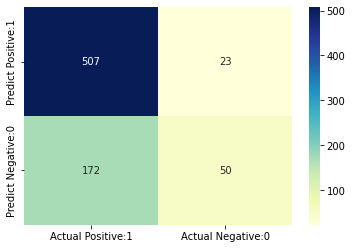

In [ ]:
cm = pd.DataFrame(data=c,columns=['Actual Positive:1','Actual Negative:0'],
                           index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
print("accuracy",a)
print("precision",p)
print("recall",r)

accuracy 0.7406914893617021
precision 0.684931506849315
recall 0.22522522522522523


# ROC Curve

In [ ]:
y_prob = final_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
final_model.score(X_test, y_pred)

0.9813829787234043

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.6000764915859256

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7509178990311067

Text(0.5, 0, 'False Positive Rate')

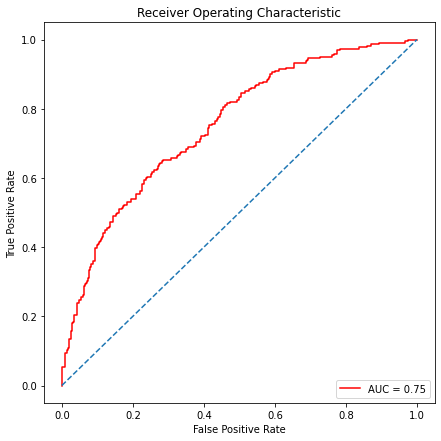

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model 2

In [ ]:
svc= SVC(C=100,probability=True)

In [ ]:
svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, probability=True)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
c=confusion_matrix(y_test,y_pred)
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)

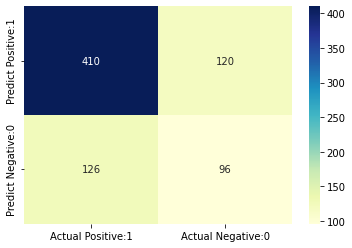

In [ ]:
cm = pd.DataFrame(data=c,columns=['Actual Positive:1','Actual Negative:0'],
                           index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
print("accuracy",a)
print("precision",p)
print("recall",r)

accuracy 0.6728723404255319
precision 0.4444444444444444
recall 0.43243243243243246


# ROC Curve

In [ ]:
y_prob = svc.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
svc.score(X_test, y_pred)

0.898936170212766

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.5371324154343022

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6711031786503484

Text(0.5, 0, 'False Positive Rate')

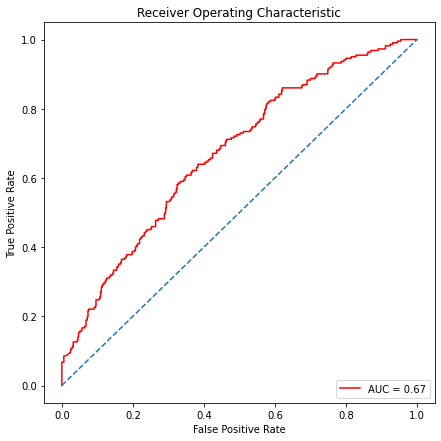

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model 3

In [ ]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

In [ ]:
svm_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
y_pred=svm_clf.predict(X_test)

In [ ]:
c=confusion_matrix(y_test,y_pred)
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)

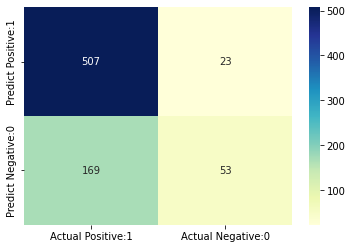

In [ ]:
cm = pd.DataFrame(data=c,columns=['Actual Positive:1','Actual Negative:0'],
                           index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
print("accuracy",a)
print("precision",p)
print("recall",r)

accuracy 0.7446808510638298
precision 0.6973684210526315
recall 0.23873873873873874


# ROC Curve

In [ ]:
y_prob = svm_clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
svm_clf.score(X_test, y_pred)

0.9813829787234043

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.6000764915859256

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7509178990311067

Text(0.5, 0, 'False Positive Rate')

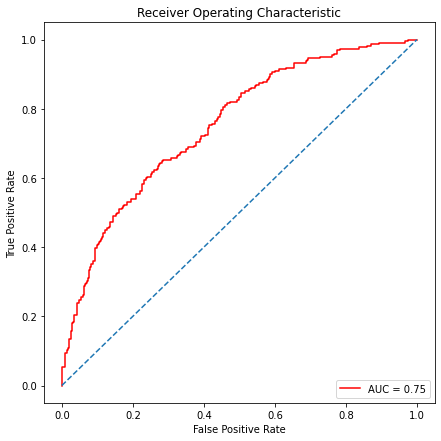

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')